<a href="https://colab.research.google.com/github/fweberling/epistasis/blob/main/Epistasis_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import networkx as nx
from analysis_utils import preprocessing, double_mut_pos, epistatic_interaction_double_mutation, epistasis_graph, \
    call_aa_simple

In [ ]:
# Specify order of mutations to be analysed
num_mut = 2

# Upload input files into panda data frame
data_frame = pd.read_csv('CPA_merge_filtered.csv')

# Specify sequence of reference protein
reference = "MRDTDVTVLGLGLMGQALAGAFLKDGHATTVWNRSEGKAGQLAEQGAVLASSARDAAEASPLVVVCVSDHAAVRAVLDPLGDVLAGRVLVNLTSGTSEQARATAEWAAERGITYLDGAIMAIPQVVGTADAFLLYSGPEAAYEAHEPTLRSLGAGTTYLGADHGLSSLYDVALLGIMWGTLNSFLHGAALLGTAKVEATTFAPFANRWIEAVTGFVSAYAGQVDQGAYPALDATIDTHVATVDHLIHESEAAGVNTELPRLVRTLADRALAGGQGGLGYAAMIEQFRSPS*"


In [ ]:
# Preprocess the data
preprocessed_data = preprocessing(data_frame, 2, reference)

Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel dete

In [ ]:
# Unpack the preprocessed data
single_mut_W_observed_std = preprocessed_data["Single Mutations"]["Observed std of fitness"]
sequence_double_list = preprocessed_data["Higher Order Mutations"]["Higher order mutants"]
W_observed_list = preprocessed_data["Higher Order Mutations"]["Observed fitness"]
W_observed_std_list = preprocessed_data["Higher Order Mutations"]["Observed std of fitness"]
W_expected_list = preprocessed_data["Higher Order Mutations"]["Expected fitness"]
W_expected_std_list = preprocessed_data["Higher Order Mutations"]["Expected std of fitness"]
epistatic_score_list = preprocessed_data["Higher Order Mutations"]["Epistatic score"]

In [ ]:
candidates_tria_combined = double_mut_pos(epistatic_score_list, W_observed_list, W_expected_std_list,
                                          W_observed_std_list, sequence_double_list, reference)

# Determine all epistatic triangles for all AA positions
AA_pos_list = np.unique(candidates_tria_combined)

epistatic_triangle_list = []

for AA_pos in range(len(AA_pos_list)):
    epistatic_triangle = epistatic_interaction_double_mutation(candidates_tria_combined, AA_pos_list[AA_pos])
    if len(epistatic_triangle) > 0:
        # Append list of triangles with the new triangles one by one
        if any(isinstance(j, list) for j in epistatic_triangle):
            for triangle in range(0, len(epistatic_triangle)):
                epistatic_triangle_list.append(sorted(epistatic_triangle[triangle]))
        # Append list of triangles with the one new triangle
        else:
            epistatic_triangle_list.append(sorted(epistatic_triangle))

# List of epistatic triangles
epistatic_triangle_list = np.unique(np.array(epistatic_triangle_list), axis=0).tolist()

print(" Epistatic triangles: ", epistatic_triangle_list)

 Epistatic triangles:  [[24.0, 241.0, 287.0], [51.0, 93.0, 120.0], [98.0, 130.0, 193.0]]


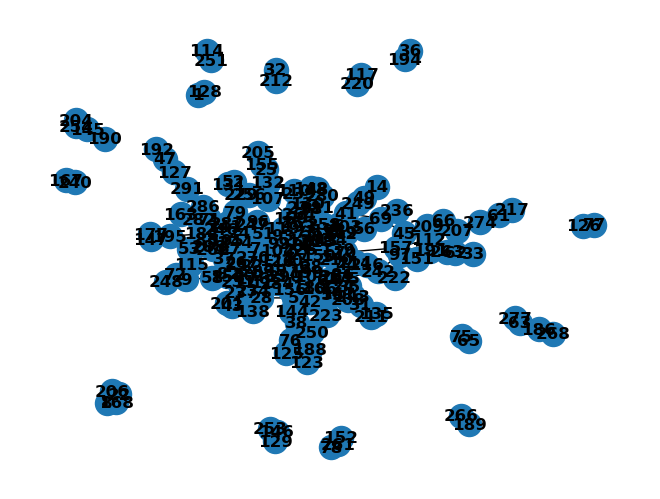

In [ ]:
# Create epistasis double_mut_epistasis_graph given list of double mutation positions
double_mut_epistasis_graph = epistasis_graph(candidates_tria_combined)

# Plot epistasis double_mut_epistasis_graph
nx.draw(double_mut_epistasis_graph, with_labels=True, font_weight='bold')
plt.show()

[[193, 11], [203, 9], [241, 8], [24, 7], [105, 6], [5, 6], [51, 6], [124, 6], [70, 6], [197, 5], [132, 5], [20, 5], [44, 5], [210, 5], [7, 4], [34, 4], [130, 4], [108, 4], [120, 4], [225, 4], [199, 4], [290, 4], [270, 4], [180, 4], [229, 4], [143, 4], [27, 4], [41, 4], [195, 3], [86, 3], [99, 3], [97, 3], [37, 3], [11, 3], [45, 3], [107, 3], [159, 3], [79, 3], [281, 3], [22, 3], [64, 3], [145, 3], [73, 3], [237, 3], [104, 3], [81, 3], [38, 3], [13, 3], [191, 3], [242, 3], [28, 3], [250, 3], [288, 3], [16, 3], [69, 3], [31, 3], [157, 3], [161, 3], [175, 3], [98, 3], [184, 2], [54, 2], [122, 2], [150, 2], [256, 2], [92, 2], [209, 2], [188, 2], [286, 2], [67, 2], [119, 2], [19, 2], [146, 2], [49, 2], [261, 2], [63, 2], [271, 2], [62, 2], [285, 2], [284, 2], [139, 2], [282, 2], [207, 2], [274, 2], [61, 2], [47, 2], [127, 2], [291, 2], [244, 2], [35, 2], [287, 2], [267, 2], [21, 2], [2, 2], [93, 2], [155, 2], [231, 2], [289, 2], [186, 2], [76, 2], [112, 2], [58, 2], [223, 2], [262, 2], [68,

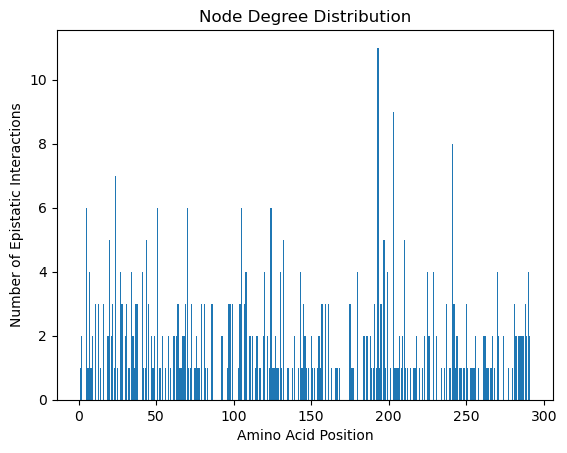

In [ ]:
# Node degree analysis (node, degree) in descending order
node_degree_list = list(map(list, sorted(double_mut_epistasis_graph.degree, key=lambda x: x[1], reverse=True)))
print(node_degree_list)

# Plot node degree list as bar chart
plt.bar(np.array(node_degree_list)[:, 0], np.array(node_degree_list)[:, 1])
plt.title("Node Degree Distribution")
plt.xlabel("Amino Acid Position")
plt.ylabel("Number of Epistatic Interactions")
plt.show()

In [ ]:
# Max clique in double_mut_epistasis_graph (usually only a triplet)
print(nx.approximation.max_clique(double_mut_epistasis_graph))

{193, 98, 130}


/var/folders/6b/kr22njw92zg2jfmwmlnclt800000gq/T/ipykernel_49239/2215372058.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  double_mut_epistasis_graph_A = nx.adjacency_matrix(double_mut_epistasis_graph).todense()


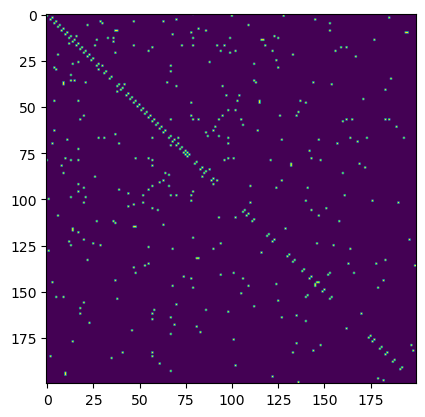

In [ ]:
# Plot adjacency matrix
double_mut_epistasis_graph_A = nx.adjacency_matrix(double_mut_epistasis_graph).todense()
plt.imshow(double_mut_epistasis_graph_A)
plt.show()

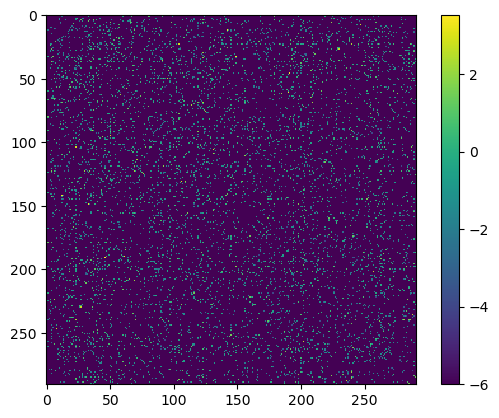

In [ ]:
# Epistatic Heatmap
epistatic_heatmap = np.ones((len(reference), len(reference))) * -6

epistatic_pos_score_list = []

for double_mut in range(len(sequence_double_list)):
    epistatic_pos_score_list_element = []
    sequence = sequence_double_list[double_mut]
    _, pos, _ = call_aa_simple(reference, sequence)
    W_observed = W_observed_list[double_mut]

    # Append list element with double mutation positions and corresponding epistatic score / observed fitness
    epistatic_pos_score_list_element.append(pos)
    epistatic_pos_score_list_element.append(W_observed)

    # Append total epistatic score list with element
    epistatic_pos_score_list.append(epistatic_pos_score_list_element)

for double_mut in range(len(epistatic_pos_score_list)):
    index_pair = epistatic_pos_score_list[double_mut][0]
    score_of_index_pair = epistatic_pos_score_list[double_mut][1]
    epistatic_heatmap[index_pair[0] - 1, index_pair[1] - 1] = score_of_index_pair
    epistatic_heatmap[index_pair[1] - 1, index_pair[0] - 1] = score_of_index_pair

plt.imshow(epistatic_heatmap, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()
